<a href="https://colab.research.google.com/github/Kanishka739/Sleep-data-analysis/blob/main/sleep_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
df.size

1200

In [6]:
df.columns.size

12

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [8]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['User ID'], axis=1, inplace=True)

In [12]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


## **AGE VS SLEEP QUALITY ANALYSIS**

In [13]:
age_sleep_quality_corr = df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [14]:
age_sleep_quality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


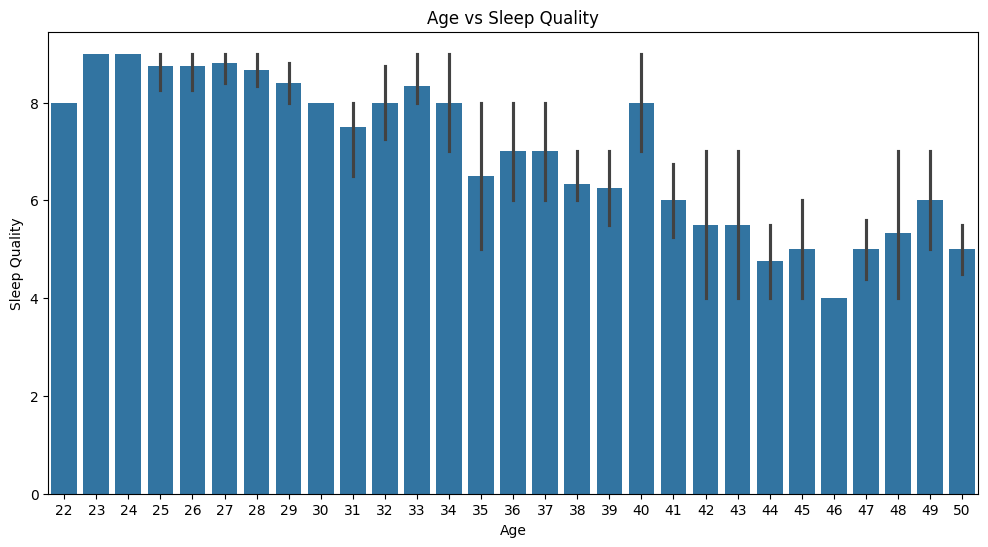

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Sleep Quality', data=df)
plt.title('Age vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()

x=df[['Age']]
y=df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [17]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190648)

In [18]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [19]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

Visualising Predicted values for X using Linear Regression


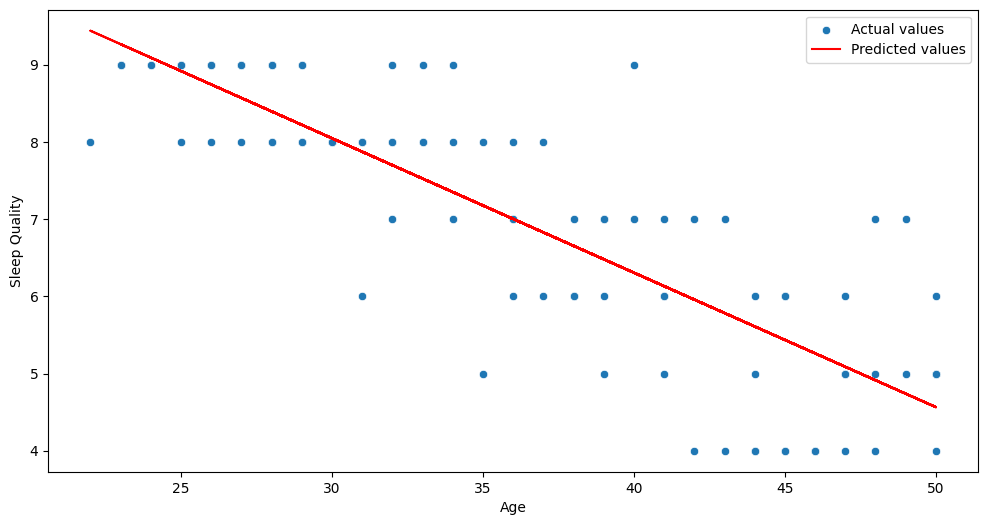

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sleep Quality', data=df,label='Actual values')
plt.plot(x, age_sleep_quality_predictions, color='red', label='Predicted values')
plt.legend()
plt.show()

## **PHYSICAL ACTIVITY VS SLEEP QUALITY**


In [21]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [22]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


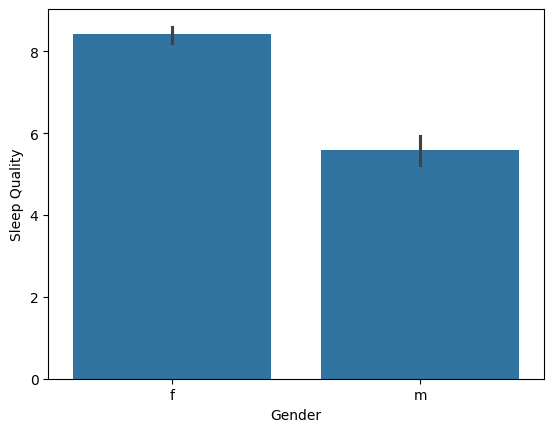

In [23]:
sns.barplot(x='Gender', y='Sleep Quality', data=df)
plt.show()

Females have better Sleep Quality overall than Males



<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

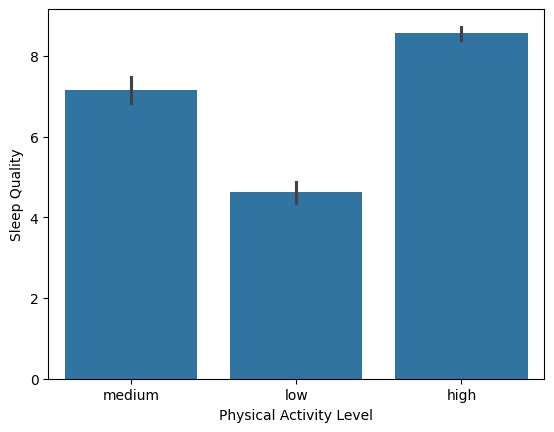

In [24]:
sns.barplot(x='Physical Activity Level', y='Sleep Quality', data=df)

In [25]:
custom_codes = {'low': 1 , 'medium': 2 , 'high': 3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

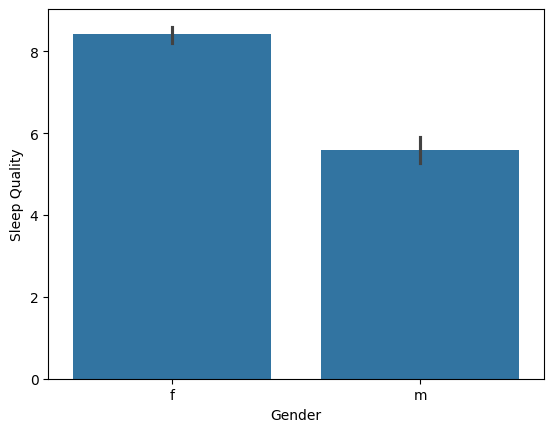

In [26]:
sns.barplot(x='Gender', y='Sleep Quality', data=df)

Females do more physical activity than males



In [27]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females,  nan_policy='omit')


physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females, nan_policy='omit')

In [28]:
print(f"t-sleep-quality  + {t_sleep_quality:.2f}")
print(f"p-sleep-quality  + {p_sleep_quality:.2f}")
print(f"t-physical_activity  + {t_physical_activity:.2f}")
print(f"p-physical_activity  + {p_physical_activity:.2f}")

t-sleep-quality  + -14.32
p-sleep-quality  + 0.00
t-physical_activity  + -10.98
p-physical_activity  + 0.00


  In simple terms, the T-test and P-value help us compare two groups (like males and females) to see if their average values (like sleep quality or physical activity level) are significantly different from each other.

What is a T-test? A T-test compares the means (average values) of two groups to determine if the difference between them is statistically significant. In your case, you're comparing:

Sleep quality of males vs. females Physical activity level of males vs. females What does the T-statistic mean? The T-statistic measures how different the means of two groups are, relative to the variation in their data. A high absolute value (like -14.32 or -10.98) means there is a large difference between the groups, while a value closer to 0 would mean there's little to no difference.

A negative T-statistic means the first group (males) has a lower mean than the second group (females). A positive T-statistic would mean the opposite (males have a higher mean). What is the P-value? The P-value tells you how likely it is that the difference you observed between the two groups is due to random chance.

If the P-value is very small (like 0.0000), it suggests that the difference between the groups is statistically significant and not just random. In other words, there's a strong likelihood that the groups are truly different. A large P-value (greater than 0.05) would mean the difference is likely due to random variation, so we wouldn't consider the difference meaningful. Why T-test and P-value for Sleep Quality and Physical Activity? You're using the T-test and P-value to answer these questions:

For Sleep Quality: "Is there a significant difference between how males and females rate their sleep quality?" The T-statistic of -14.32 and P-value of 0.0000 show that males and females have a statistically significant difference in their sleep quality, with males having a lower average sleep quality than females. For Physical Activity Level: "Is there a significant difference in the physical activity levels between males and females?" The T-statistic of -10.98 and P-value of 0.0000 again indicate a significant difference, with males having lower physical activity levels compared to females. Summary You found the T-values and P-values to compare the average sleep quality and physical activity levels between males and females. Since both P-values are close to 0, it means the differences you found are statistically significant, meaning males and females are likely to have different sleep quality and physical activity levels in the dataset.

In [29]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return int(h) + int(m)/60

df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


In [30]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


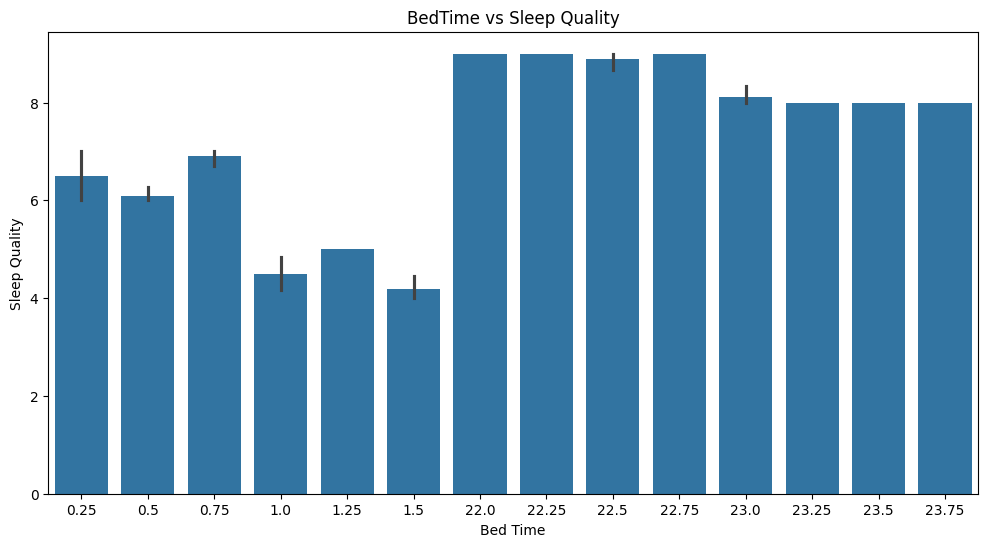

In [31]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.xlabel("Bed Time")
plt.ylabel("Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.show()

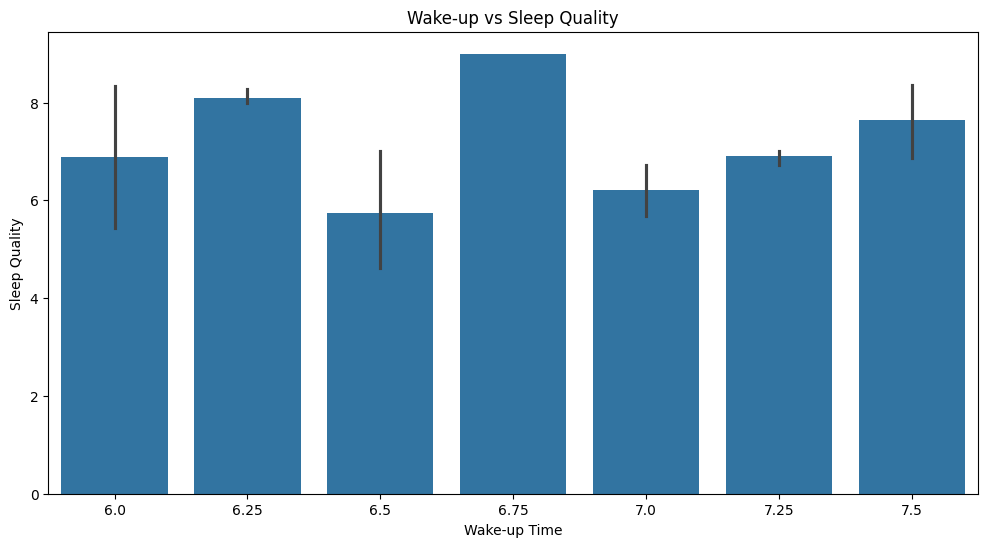

In [32]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

Checking Linear Relationship between Sleep Time Hours & Sleep Quality

In [33]:
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

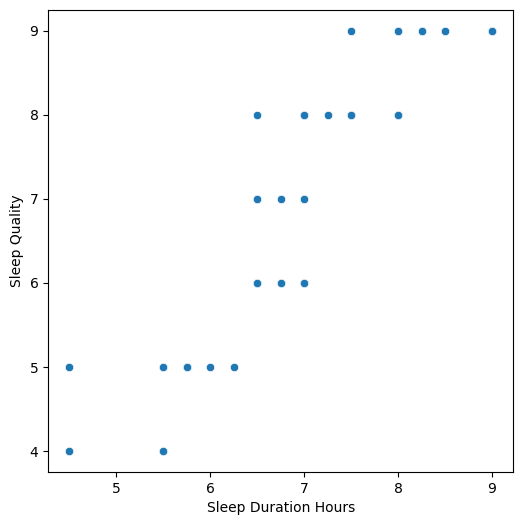

In [34]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.show()

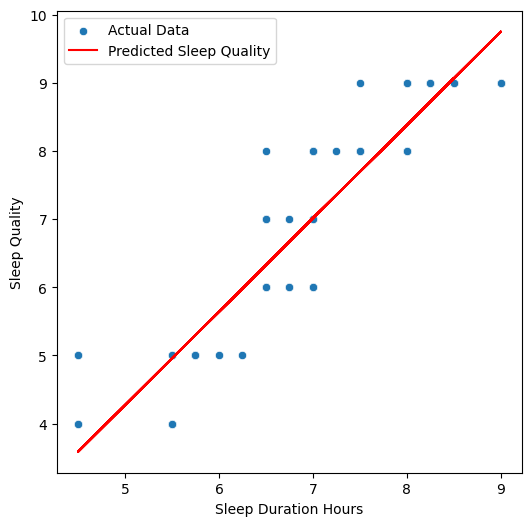

In [35]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()


Amount of calories burnt vs Sleep Quality

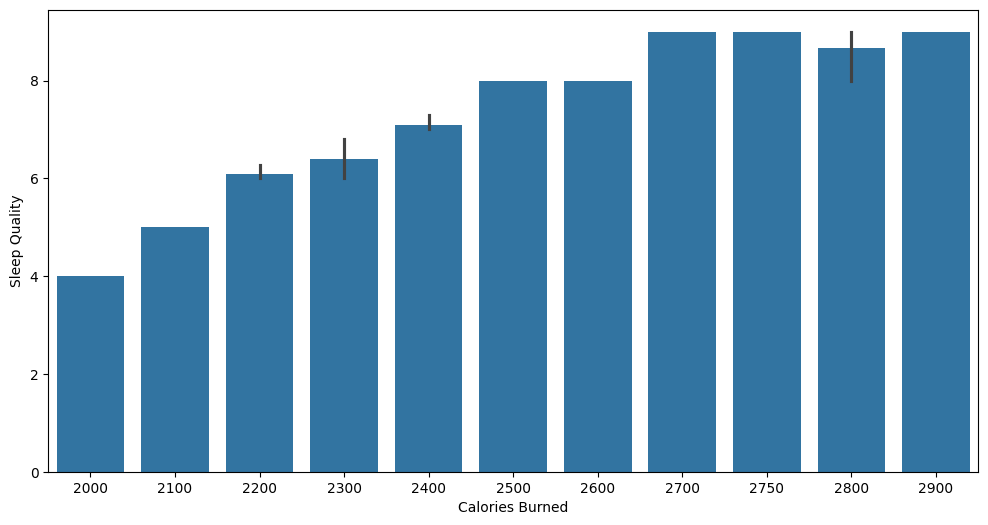

In [36]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()